In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('Kaggle_Bankruptcy.xlsx')

In [3]:
df

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.027951,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.031470,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.007542,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.022916,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [4]:
#Problem 1: Using “train_test_split” split your data into training data and test data. Use the
#“stratify” optional argument to make sure that the train data and test data are similar in terms of
#the target variable (“Bankrupt”). Use 25% of your data as test set. Choose a random_state=4
#throughout.
X=df.drop(labels=['Bankrupt'], axis=1)
y=df['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4, stratify=y)

In [5]:
#Problem 2: Normalize your train data so that each feature has an average of 0 and a standard
#deviation of 1. Normalize the test data using the train data average and standard deviation (as we
#did in class).

_avrg=X_train.mean()
_std=X_train.std()
X_train_normalized=(X_train - _avrg)/ (_std)
X_test_normalized=(X_test - _avrg)/ (_std)

In [6]:
#Problem 3: Use all features and estimate a logistic regression to predict “Bankrupt”. Calculate
#four accuracy measures (accuracy, precision, recall, f1-score) discussed in class for both test data
#and train data. Report the accuracy results in the word file and discuss whether the model is
#overfitting.

my_logreg=LogisticRegression(penalty='l2',solver='lbfgs', random_state = 4, max_iter = 500).fit(X_train_normalized,y_train)
print(my_logreg.score(X_train_normalized,y_train) , my_logreg.score(X_test_normalized,y_test))

0.9724286272976144 0.9700879765395894


In [7]:
np.set_printoptions(threshold=sys.maxsize)
my_logreg.predict(X_train_normalized)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
y_train_pred = my_logreg.predict(X_train_normalized)
y_test_pred = my_logreg.predict(X_test_normalized)

accuracy_train = accuracy_score(y_train, my_logreg.predict(X_train_normalized))
precision_train = precision_score(y_train, my_logreg.predict(X_train_normalized))
recall_train = recall_score(y_train, my_logreg.predict(X_train_normalized))
f1_score_train = f1_score(y_train, my_logreg.predict(X_train_normalized))

accuracy_test = accuracy_score(y_test, my_logreg.predict(X_test_normalized))
precision_test = precision_score(y_test, my_logreg.predict(X_test_normalized))
recall_test = recall_score(y_test, my_logreg.predict(X_test_normalized))
f1_score_test = f1_score(y_test, my_logreg.predict(X_test_normalized))

print("\nTraining Accuracy:", accuracy_train)
print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1 Score:", f1_score_train)

print("\nTest Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_score_test)


Training Accuracy: 0.9724286272976144
Training Precision: 0.6714285714285714
Training Recall: 0.28484848484848485
Training F1 Score: 0.4

Test Accuracy: 0.9700879765395894
Test Precision: 0.5833333333333334
Test Recall: 0.2545454545454545
Test F1 Score: 0.3544303797468354


In [9]:
np.logspace(-3,3,10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

In [10]:
results=pd.DataFrame(columns=['C','score_train','score_test','precision_train','precision_test','recall_train','recall_test','f1_train','f1_test'])
for a in np.logspace(-3,0,100):
    my_log=LogisticRegression(penalty='l2',solver='lbfgs',C=a,max_iter=500).fit(X_train_normalized,y_train)
    results.loc[len(results)]=[a, my_log.score(X_train_normalized,y_train),my_log.score(X_test_normalized,y_test), precision_score(y_train,my_log.predict(X_train_normalized)), precision_score(y_test,my_log.predict(X_test_normalized)),recall_score(y_train,my_log.predict(X_train_normalized)), recall_score(y_test,my_log.predict(X_test_normalized)), f1_score(y_train,my_log.predict(X_train_normalized)), f1_score(y_test,my_log.predict(X_test_normalized)) ]
   

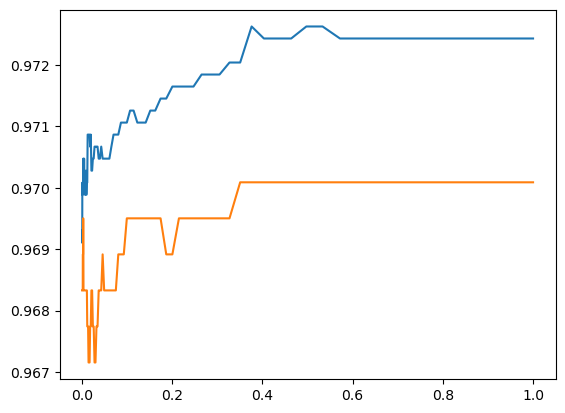

In [11]:
plt.plot(results['C'],results['score_train'])
plt.plot(results['C'],results['score_test'])

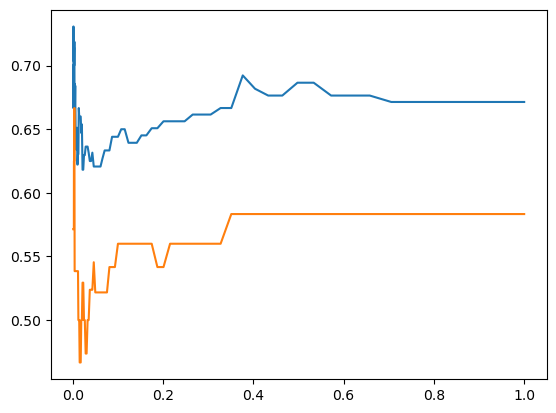

In [12]:
plt.plot(results['C'],results['precision_train'])
plt.plot(results['C'],results['precision_test'])

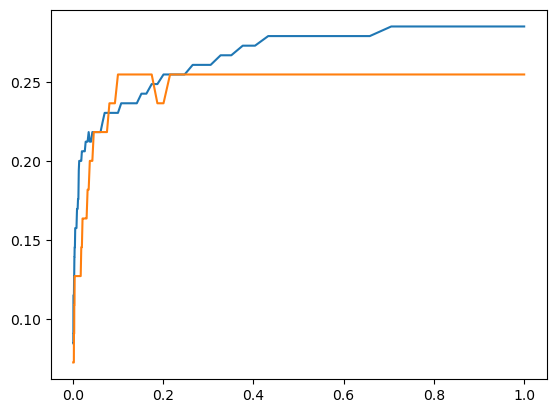

In [13]:
plt.plot(results['C'],results['recall_train'])
plt.plot(results['C'],results['recall_test'])

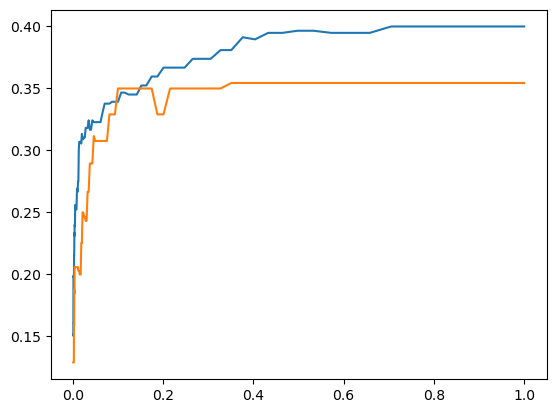

In [14]:
plt.plot(results['C'],results['f1_train'])
plt.plot(results['C'],results['f1_test'])

In [15]:
#Problem 4: Use all features and estimate a logistic regression with LASSO regularization. Find
#the regularization parameter so that the model has the highest F1-score on the test data. Report, in
#the word file, the regularization parameter (“C”) of the model with the highest F1-score on the
#test data. Report, in the word file, all accuracy measures for the train and test data.

lasso_model = LogisticRegression(penalty='l1', solver='saga', random_state=4, max_iter=10000)  # Increase max_iter and use 'saga'

param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(lasso_model, param, scoring='f1', cv=5, n_jobs=-1)  # Enable parallelization
grid.fit(X_train_normalized, y_train)

best_C = grid.best_params_['C']

lasso_model = LogisticRegression(penalty='l1', solver='saga', C=best_C, random_state=4, max_iter=10000)  # Increase max_iter and use 'saga'

lasso_model.fit(X_train_normalized, y_train)

y_train_pred_l1 = lasso_model.predict(X_train_normalized)
y_test_pred_l1 = lasso_model.predict(X_test_normalized)

train_report = classification_report(y_train, y_train_pred_l1)

test_report = classification_report(y_test, y_test_pred_l1)

print(f"Best Regularization Parameter (C): {best_C}")
print("\nTrain Data Classification Report:")
print(train_report)

print("\nTest Data Classification Report:")
print(test_report)


Best Regularization Parameter (C): 1

Train Data Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4949
           1       0.68      0.27      0.38       165

    accuracy                           0.97      5114
   macro avg       0.83      0.63      0.68      5114
weighted avg       0.97      0.97      0.97      5114


Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.56      0.25      0.35        55

    accuracy                           0.97      1705
   macro avg       0.77      0.62      0.67      1705
weighted avg       0.96      0.97      0.96      1705



In [16]:
#Problem 5: Repeat 4 with Ridge regularization.

ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', random_state=4, max_iter=10000)

param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

f1_scorer = make_scorer(f1_score)
grid = GridSearchCV(ridge_model, param, scoring=f1_scorer, cv=5)

grid.fit(X_train_normalized, y_train)

best_C = grid.best_params_['C']

ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', C=best_C, random_state=4,max_iter=10000)
ridge_model.fit(X_train_normalized, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_normalized)

y_test_pred_ridge = ridge_model.predict(X_test_normalized)

train_accuracy = accuracy_score(y_train, y_train_pred_ridge)
train_precision = precision_score(y_train, y_train_pred_ridge)
train_recall = recall_score(y_train, y_train_pred_ridge)
train_f1_score = f1_score(y_train, y_train_pred_ridge)

test_accuracy = accuracy_score(y_test, y_test_pred_ridge)
test_precision = precision_score(y_test, y_test_pred_ridge)
test_recall = recall_score(y_test, y_test_pred_ridge)
test_f1_score = f1_score(y_test, y_test_pred_ridge)

print("Best Regularization Parameter (C):", best_C)

print("\nTraining Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Best Regularization Parameter (C): 10

Training Accuracy: 0.9728197105983575
Training Precision: 0.6756756756756757
Training Recall: 0.30303030303030304
Training F1 Score: 0.4184100418410042

Test Accuracy: 0.9683284457478006
Test Precision: 0.5185185185185185
Test Recall: 0.2545454545454545
Test F1 Score: 0.3414634146341463


In [18]:
ridge_model.score(X_test_normalized, y_test)

0.9683284457478006

In [19]:
#Problem 6: Repeat 4 with support vector machine classifier.

from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

my_svc=LinearSVC(dual=False,C=0.01).fit(X_train_normalized,y_train)
print(my_svc.score(X_train_normalized,y_train) , my_svc.score(X_test_normalized,y_test))

0.9710598357450136 0.9683284457478006


In [20]:
svm_model = SVC(kernel='rbf', random_state=4)

param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(svm_model, param, scoring='f1', cv=5)
grid.fit(X_train_normalized, y_train)

C_svm = grid.best_params_['C']
gamma_svm = grid.best_params_['gamma']

svm_model = SVC(kernel='rbf', C=C_svm, gamma=gamma_svm, random_state=4)

svm_model.fit(X_train_normalized, y_train)

y_train_pred_svm = svm_model.predict(X_train_normalized)
y_test_pred_svm = svm_model.predict(X_test_normalized)

train_accuracy = accuracy_score(y_train, y_train_pred_svm)
train_precision = precision_score(y_train, y_train_pred_svm)
train_recall = recall_score(y_train, y_train_pred_svm)
train_f1_score = f1_score(y_train, y_train_pred_svm)

test_accuracy = accuracy_score(y_test, y_test_pred_svm)
test_precision = precision_score(y_test, y_test_pred_svm)
test_recall = recall_score(y_test, y_test_pred_svm)
test_f1_score = f1_score(y_test, y_test_pred_svm)

print("Best Regularization Parameter (C):", C_svm)
print("Best Regularization Parameter (Gama):", gamma_svm)

print("\nTraining Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Best Regularization Parameter (C): 100
Best Regularization Parameter (Gama): 0.01

Training Accuracy: 0.996675791943684
Training Precision: 1.0
Training Recall: 0.896969696969697
Training F1 Score: 0.9456869009584664

Test Accuracy: 0.9607038123167155
Test Precision: 0.34210526315789475
Test Recall: 0.23636363636363636
Test F1 Score: 0.27956989247311825


In [21]:
#Problem 7: Repeat 4 with a decision tree classifier. 
#(For regularization, change the arguments as we did in class.)

my_dtc = DecisionTreeClassifier(max_depth=4,min_samples_leaf=30,random_state=8,criterion="gini").fit(X_train_normalized,y_train)

print("Training set score: {:.3f}".format(my_dtc.score(X_train_normalized, y_train)))
print("Test set score: {:.3f}".format(my_dtc.score(X_test_normalized, y_test)))

Training set score: 0.970
Test set score: 0.965


In [22]:
tree_model = DecisionTreeClassifier(random_state=4)

param_grid = {'max_depth': [None, 5, 10, 15, 20]}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(tree_model, param_grid, scoring=f1_scorer, cv=5)

grid_search.fit(X_train_normalized, y_train)

best_max_depth = grid_search.best_params_['max_depth']

tree_model_best = DecisionTreeClassifier(max_depth=best_max_depth, random_state=4)
tree_model_best.fit(X_train_normalized, y_train)

y_train_pred_dt = tree_model_best.predict(X_train_normalized)

y_test_pred_dt = tree_model_best.predict(X_test_normalized)

train_accuracy = accuracy_score(y_train, y_train_pred_dt)
train_precision = precision_score(y_train, y_train_pred_dt)
train_recall = recall_score(y_train, y_train_pred_dt)
train_f1_score = f1_score(y_train, y_train_pred_dt)

test_accuracy = accuracy_score(y_test, y_test_pred_dt)
test_precision = precision_score(y_test, y_test_pred_dt)
test_recall = recall_score(y_test, y_test_pred_dt)
test_f1_score = f1_score(y_test, y_test_pred_dt)

print("Best Max Depth Parameter:", best_max_depth)

print("\nTraining Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Best Max Depth Parameter: 10

Training Accuracy: 0.9964802502933124
Training Precision: 1.0
Training Recall: 0.8909090909090909
Training F1 Score: 0.9423076923076923

Test Accuracy: 0.9577712609970674
Test Precision: 0.3508771929824561
Test Recall: 0.36363636363636365
Test F1 Score: 0.3571428571428571


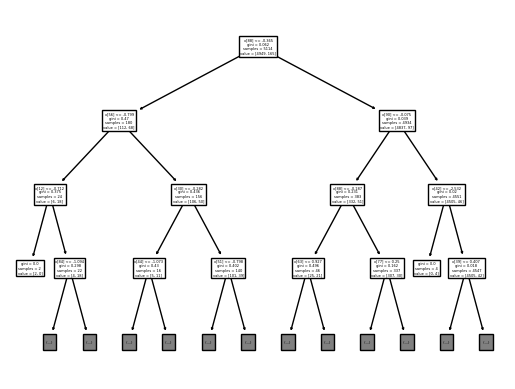

In [26]:
test=tree.plot_tree(tree_model_best,max_depth=3)

In [32]:
#Problem 8: Repeat 4 with a random forest classifier. 
#(For regularization, change the arguments as we did in class.)

rf_model = RandomForestClassifier(random_state=4)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(rf_model, param_grid, scoring=f1_scorer, cv=5)

grid_search.fit(X_train_normalized, y_train)

best_params = grid_search.best_params_

rf_model_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=4
)

rf_model_best.fit(X_train_normalized, y_train)

y_train_pred_rf = rf_model_best.predict(X_train_normalized)

y_test_pred_rf = rf_model_best.predict(X_test_normalized)

train_accuracy = accuracy_score(y_train, y_train_pred_rf)
train_precision = precision_score(y_train, y_train_pred_rf)
train_recall = recall_score(y_train, y_train_pred_rf)
train_f1_score = f1_score(y_train, y_train_pred_rf)

test_accuracy = accuracy_score(y_test, y_test_pred_rf)
test_precision = precision_score(y_test, y_test_pred_rf)
test_recall = recall_score(y_test, y_test_pred_rf)
test_f1_score = f1_score(y_test, y_test_pred_rf)

print("Best Hyperparameters:", best_params)

print("\nTraining Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1_score)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

Training Accuracy: 0.9890496675791943
Training Precision: 1.0
Training Recall: 0.6606060606060606
Training F1 Score: 0.7956204379562044

Test Accuracy: 0.9700879765395894
Test Precision: 0.6666666666666666
Test Recall: 0.14545454545454545
Test F1 Score: 0.23880597014925373


In [28]:
from sklearn.metrics import f1_score

f1 = {
    'Ridge':f1_score(y_test, y_test_pred_ridge),
    'LogReg':f1_score(y_test, y_test_pred_l1),
    'SVM': f1_score(y_test, y_test_pred_svm),
    'Decision Tree':f1_score(y_test, y_test_pred_dt),
    'Random Forest':f1_score(y_test, y_test_pred_rf)
}

print("F1 Scores on Test Data:\n")
for i in f1:
    print(f'{i}:{f1[i]}')

print(f'\nHighest F1-score on Test Data: {max(f1, key=f1.get)}: {f1[max(f1, key=f1.get)]}')

F1 Scores on Test Data:

Ridge:0.3414634146341463
LogReg:0.35
SVM:0.27956989247311825
Decision Tree:0.3571428571428571
Random Forest:0.23880597014925373

Highest F1-score on Test Data: Decision Tree: 0.3571428571428571
